In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import finplot as fplt

from Indicator import Indicator

def fillindicator(df):
    indicator = Indicator()
    train_set = indicator.MACD(df)
    train_set = indicator.DMI(df)
    train_set = indicator.AROON(df)
    train_set = indicator.ATR(df)
    train_set = indicator.CCI(df)
    train_set = indicator.OBV(df)
    return train_set

In [2]:
start = datetime.datetime(2019,10,1)#26 day before start year for make indicator
end = datetime.datetime(2021,1,1)

In [3]:
stock = 'KTC.bk'
df = web.DataReader(stock,'yahoo',start,end)
df = fillindicator(df)
df = df.iloc[61:]

C:\Users\jame_\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\jame_\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [4]:
df['signal'] = 0
df.loc[((df['MACD']>df['SIGNAL LINE'])&(df['MACD'].shift()<df['SIGNAL LINE'].shift())),'signal'] = 1
df.loc[((df['MACD']<df['SIGNAL LINE'])&(df['MACD'].shift()>df['SIGNAL LINE'].shift())),'signal'] = 2

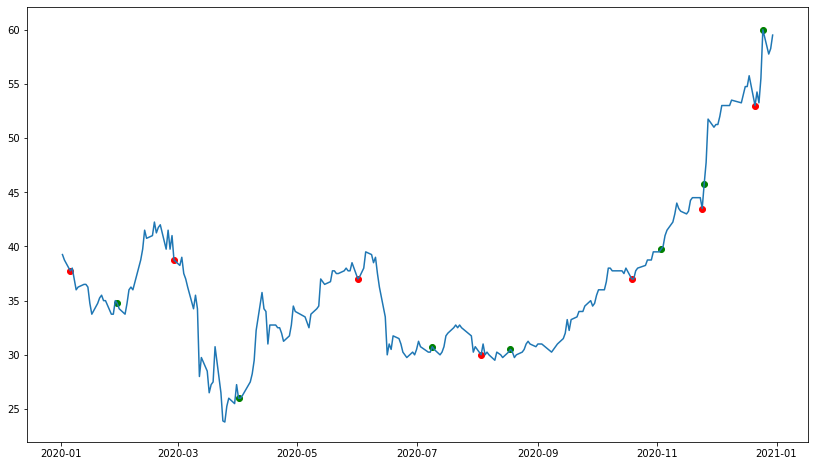

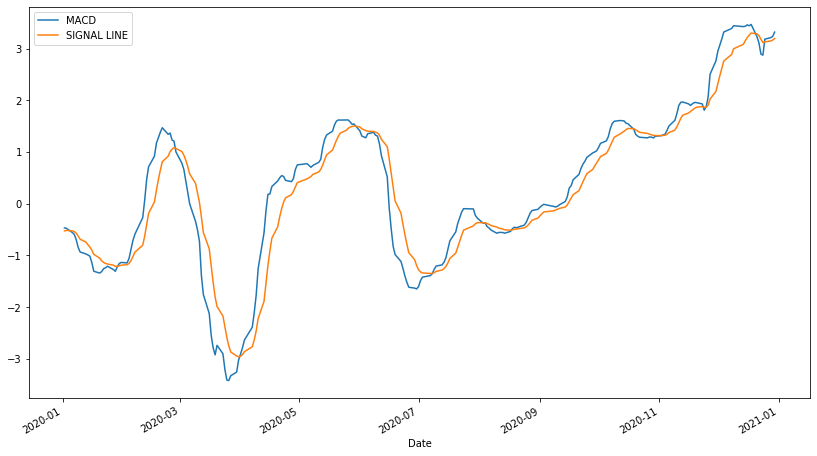

In [5]:
plt.figure(figsize=(14,8))
plt.plot(df.index,df['Close'])

prd = []
for i ,row in df.iterrows():
    if row['signal']==1:
        plt.scatter(x=i, y=row['Close'], c='green')
        prd.append(('buy',row['Close']))
    elif row['signal']==2:
        plt.scatter(x=i, y=row['Close'], c='red')
        prd.append(('sell',row['Close']))
df[['MACD','SIGNAL LINE']].plot(figsize=(14,8))
plt.show()

In [6]:
if prd[0][0]=='sell':
    del prd[0]
if len(prd) %2!=0:
    del prd[-1]
prd

[('buy', 34.75),
 ('sell', 38.75),
 ('buy', 26.0),
 ('sell', 37.0),
 ('buy', 30.75),
 ('sell', 30.0),
 ('buy', 30.5),
 ('sell', 37.0),
 ('buy', 39.75),
 ('sell', 43.5),
 ('buy', 45.75),
 ('sell', 53.0)]

In [7]:
b = []
s = []
for i in prd:
    if i[0] =='buy':
        b.append(i[1])
    else:
        s.append(i[1])
sum(np.array(s)-np.array(b))

31.75